In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm

from utils import quick_load_liuzhong_health_check_data, parse_dict_with_default
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

%matplotlib inline
%load_ext autoreload
%autoreload 2

warnings.filterwarnings("ignore")

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

## Scatter plot by months

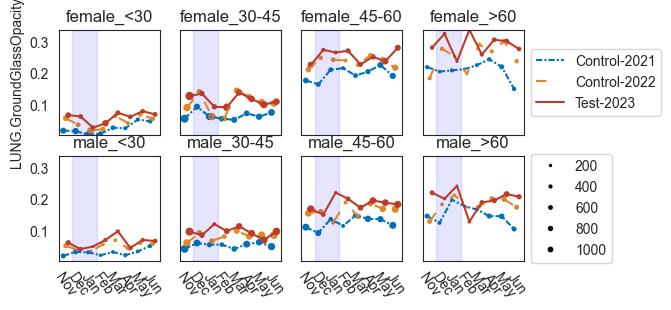

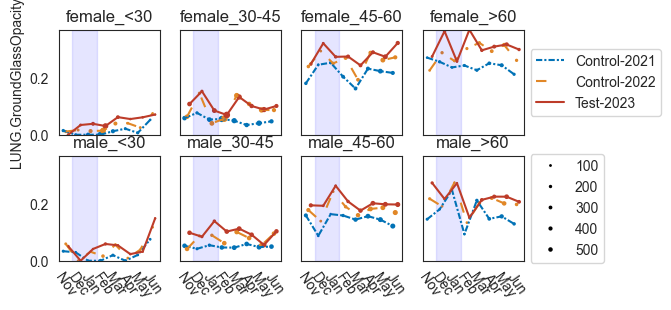

In [2]:
scatter_plot = Scatter(figsize=(6,3))
stack_plot = Stack(figsize=(4,4))

tag = "LUNG.GroundGlassOpacity"
l_months = [11,12,1,2,3,4,5,6]

fig,df_scatter_all = scatter_plot.plot_scatter_ax_plus(df_table1plus, tag, order=l_months)
# fig.savefig("../../analysis/liuzhong/human/clinical/figures/Figure4_Lung-Scatter-all.pdf")
fig,df_scatter_3p = scatter_plot.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)
fig.savefig(f"{workdir}/Figure4_C.pdf")

## Boxplot by months

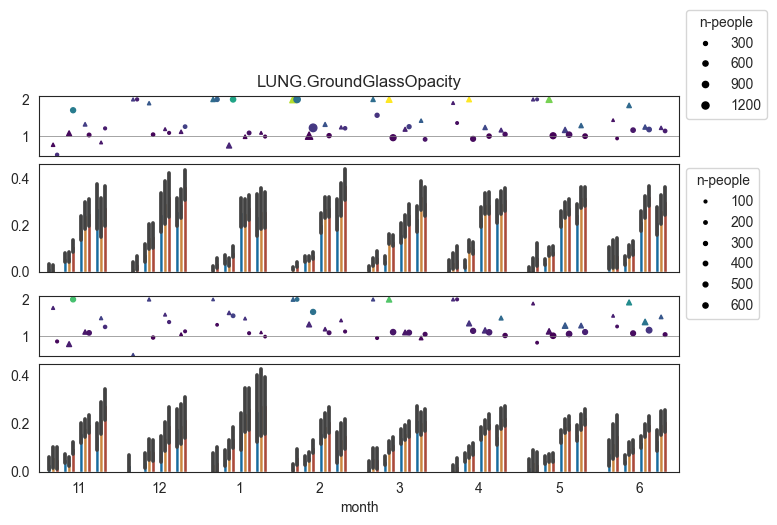

In [3]:
from plot_utils import BxxPvalue

plot_box = BxxPvalue(figsize=(8,4))
tag = "LUNG.GroundGlassOpacity"
fig, _ = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                   hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="bar"
)
fig.savefig(f"{workdir}/Figure4_D.pdf")

## Stack for all features

lung_state        period  month  LUNG.GroundGlassOpacity     Normal  total
0           Control-2021      1                 8.171664  91.769547   1701
1           Control-2021      2                 5.870547  94.079277   3986
2           Control-2021      3                 9.043928  90.859173   3096
3           Control-2021      4                12.161687  87.697715   2845
4           Control-2021      5                12.038482  87.831513   3846
5           Control-2021      6                11.149294  88.621611   2619
6           Control-2021     11                 9.451627  90.057958   2243
7           Control-2021     12                11.534702  87.292278   1023
8           Control-2022      1                 9.641387  90.299824   1701
9           Control-2022      2                 8.103362  91.846463   3986
10          Control-2022      3                14.341085  85.562016   3096
11          Control-2022      4                16.942004  82.917399   2845
12          Control-2022      5                16.380655  83.489340   3846
13          Control-2022      6                16.342115  83.428790   2619
14          Control-2022     11                11.056621  88.452965   2243
15          Control-2022     12                15.249267  83.577713   1023
16             Test-2023      1                13.403880  86.537331   1701
17             Test-2023      2                10.712494  89.237331   3986
18             Test-2023      3                15.826873  84.076227   3096
19             Test-2023      4                18.347979  81.511424   2845
20             Test-2023      5                17.836713  82.033281   3846
21             Test-2023      6                19.205804  80.565101   2619
22             Test-2023     11                14.890771  84.618814   2243
23             Test-2023     12                18.572825  80.254154   1023

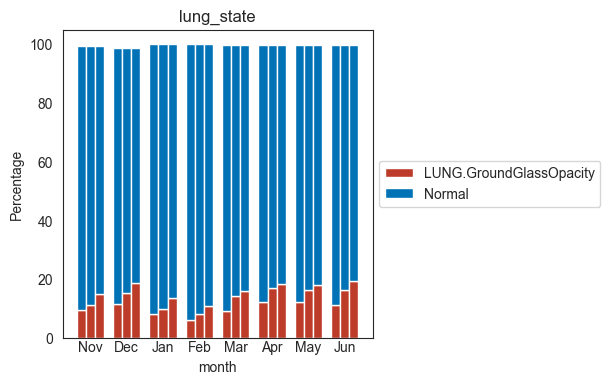

In [4]:
x = "month"
order= [11,12, 1,2,3, 4,5,6]
hue = "period"
hue_order = ["Control-2021", "Control-2022", "Test-2023"]
y = "lung_state"
y_order = ["LUNG.GroundGlassOpacity"]
pal = ["#BD3C29", "#0172B6", "#E18727", "#21854F", "#787681"]



fig,stack_data = stack_plot.plot_bar_stacked(df_table1plus_3p_revMM, x, hue, y, y_order, order=order, hue_order=hue_order, 
            cmap=pal)
fig.savefig(f"{workdir}/Figure4_B.pdf")
stack_data

## Scatter for all features

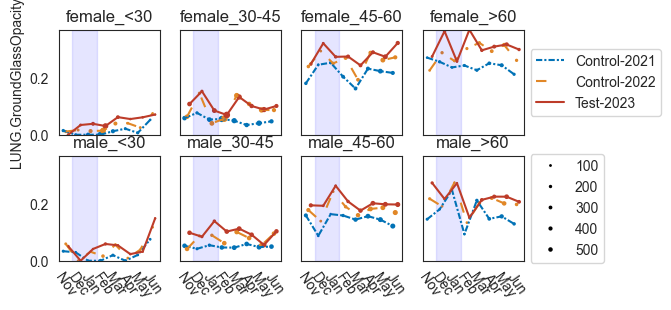

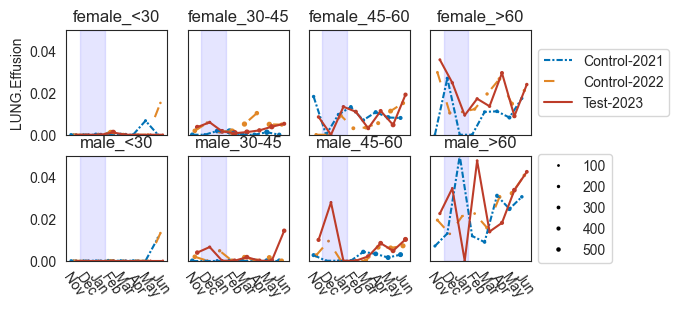

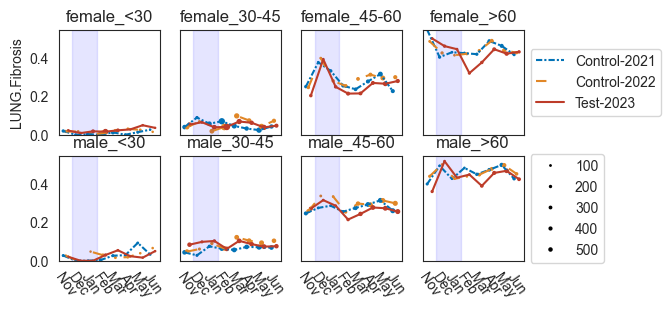

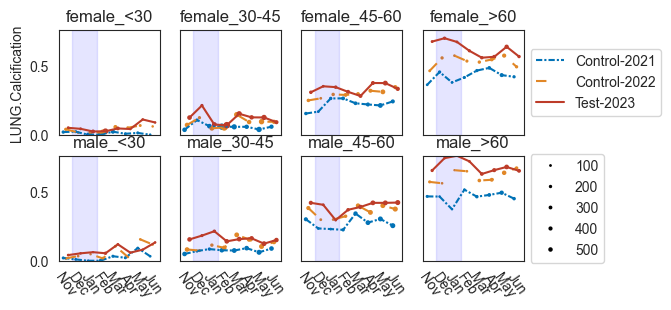

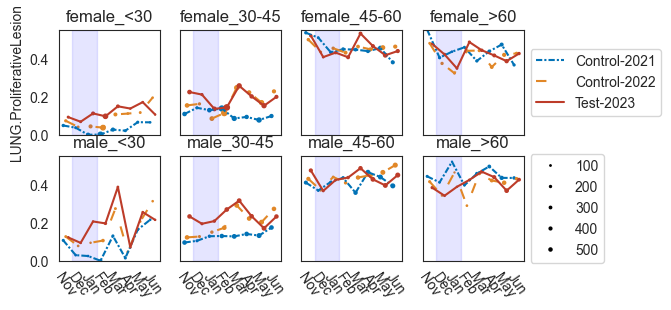

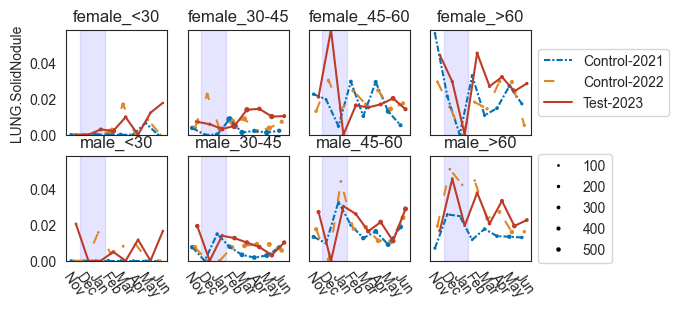

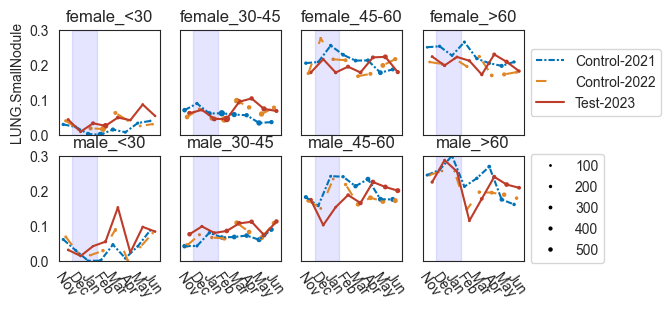

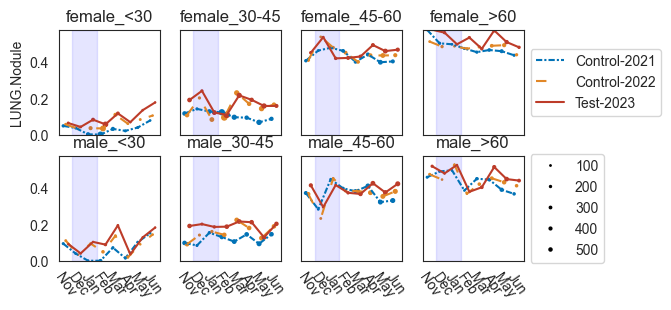

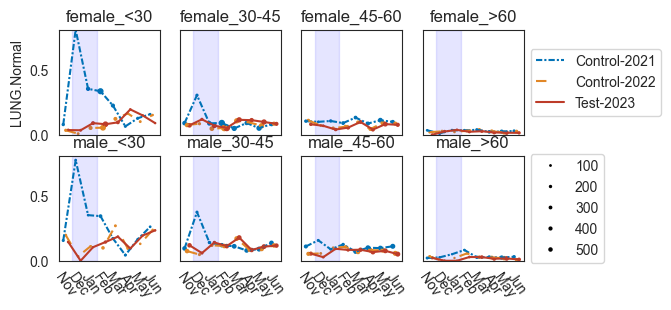

In [5]:
l_tags = ["LUNG.GroundGlassOpacity", "LUNG.Effusion", "LUNG.Fibrosis", "LUNG.Calcification", "LUNG.ProliferativeLesion",
    "LUNG.SolidNodule", "LUNG.SmallNodule", "LUNG.Nodule", "LUNG.Normal"
]
for tag in l_tags:
    fig,_ = scatter_plot.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)


## Barplot for lung states in 3 periods

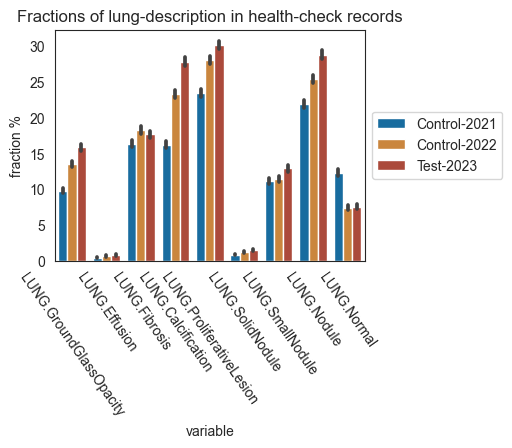

In [6]:
my_pal = ["#0172B6", "#E18727", "#BD3C29", "#21854F", "#7876B1", "#6F99AD", "#00A087", "#EE4C97"]

df_plot = pd.melt(
    df_table1plus_3p_revMM[l_tags + ["period"]],
    id_vars=["period"]
)
df_plot["value"] = df_plot["value"]*100
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
sns.barplot(df_plot, x="variable", y="value", hue="period", palette=my_pal, ax=ax)
ax.set_xticklabels(l_tags, rotation=305)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Fractions of lung-description in health-check records")
ax.set_ylabel("fraction %")
fig.savefig(f"{workdir}/Figure4_A.pdf")

## Barplot for GroundGlassOpacity-state of Jan in 3 periods

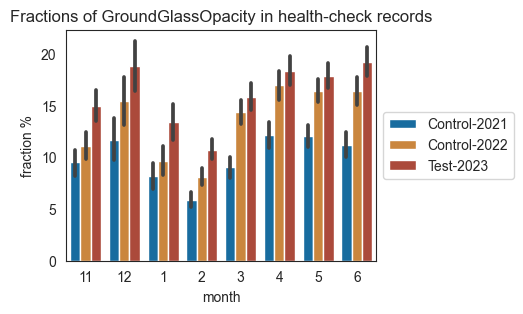

In [7]:
my_pal = ["#0172B6", "#E18727", "#BD3C29", "#21854F", "#7876B1", "#6F99AD", "#00A087", "#EE4C97"]

df_plot = df_table1plus_3p_revMM[l_tags[0:1]+["period", "month"]]
df_plot.columns = ["value", "period", "month"]
df_plot["value"] = df_plot["value"]*100
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(1,1,1)
sns.barplot(df_plot, x="month", y="value", hue="period", palette=my_pal, ax=ax, order=[11,12,1,2,3,4,5,6])
# ax.set_xticklabels(l_tags, rotation=305)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("Fractions of GroundGlassOpacity in health-check records")
ax.set_ylabel("fraction %")
fig.savefig(f"{workdir}/FigureS4_C.pdf")

## Sankey plot of GroundGlassOpacity

In [8]:
df_cnt = pd.melt(
        df_table1plus_3p_revMM[ ["sample_id",'LUNG.GroundGlassOpacity', "LUNG.Calcification", "period", "month", "age_groups","gender"] ],
        id_vars = ["sample_id", "month", "period", "age_groups", "gender"]
    ).pivot(
        index=["sample_id","variable", "month", "age_groups", "gender"], 
        columns="period", 
        values="value"
    ).reset_index().drop(["sample_id"], axis=1).value_counts().reset_index()


from plot_utils import Sankey

sankey_plot = Sankey()

l_pairs = [["Control-2021","Control-2022"], ["Control-2022","Test-2023"]]
month = 1
tag = "LUNG.GroundGlassOpacity"
l_age_groups = ["<30", "30-45", "45-60", ">60"]

fig, _ = sankey_plot.plot_sankey_subplots(df_cnt, [11,12], tag, l_age_groups, l_pairs, prefix="Figure3")
fig, sankey_obj = sankey_plot.plot_sankey_subplots(df_cnt, [1,2], tag, l_age_groups, l_pairs, prefix="Figure3")

fig.show()
sankey_obj

import plotly.io as pio
pio.write_image(fig, f"{workdir}/FigureS4_D.pdf")

## Sankey plot of Calification

In [9]:
tag = "LUNG.Calcification"
fig, sankey_plot = sankey_plot.plot_sankey_subplots(df_cnt, [1,2], tag, l_age_groups, l_pairs, prefix="Figure3")
fig.show()

import plotly.io as pio
pio.write_image(fig, f"{workdir}/FigureS4_E.pdf")

sankey_plot

{'<30': {'female': {'nodes': [{'label': 'Control-2021_0'},
    {'label': 'Control-2021_1'},
    {'label': 'Control-2022_0'},
    {'label': 'Control-2022_1'},
    {'label': 'Test-2023_0'},
    {'label': 'Test-2023_1'}],
   'edges': [{'source': 0, 'target': 2, 'value': 1260},
    {'source': 0, 'target': 3, 'value': 16},
    {'source': 1, 'target': 2, 'value': 1},
    {'source': 1, 'target': 3, 'value': 0},
    {'source': 2, 'target': 4, 'value': 1233},
    {'source': 2, 'target': 5, 'value': 28},
    {'source': 3, 'target': 4, 'value': 12},
    {'source': 3, 'target': 5, 'value': 4}]},
  'male': {'nodes': [{'label': 'Control-2021_0'},
    {'label': 'Control-2021_1'},
    {'label': 'Control-2022_0'},
    {'label': 'Control-2022_1'},
    {'label': 'Test-2023_0'},
    {'label': 'Test-2023_1'}],
   'edges': [{'source': 0, 'target': 2, 'value': 246},
    {'source': 0, 'target': 3, 'value': 4},
    {'source': 1, 'target': 2, 'value': 0},
    {'source': 1, 'target': 3, 'value': 0},
    {'source

## Check lung states

In [10]:
%%time
dir_path = "/cluster/home/bqhu_jh/projects/healthman/"

df_main   = pd.read_parquet(f"{dir_path}/analysis/main.parquet")
df_merged = pd.read_parquet(f"{dir_path}/analysis/detail.parquet")
df_main.loc[
        df_main["sample_id"]=="Mzi4RtCk8Er3epHz17cxM8ytDzhxZ9ZxW1K5NNZKUwt3ug==", "birthday"
] = "1977-05-27"


CPU times: user 15.7 s, sys: 4.22 s, total: 19.9 s
Wall time: 10.6 s


In [11]:
from utils import parse_man_info
def detect_descriptions(x, descriptions):
    if pd.isna(x):
        return x
    
    for description in descriptions.split("|"):
        if re.search(description, x):
            return 1
    return 0


def aggr_table(x):
    try:
        return np.nanmean([float(v) for v in x])
    except:
        return ";".join(str(v) for v in x)


def extract_text_from_details(df_merged, scan_items, dict_descriptions):
    df_tmp_pvt = df_merged[df_merged["combine_item_name"].\
                isin(scan_items)]\
                [["exam_id", "conclusion", "operation_date"]].\
                pivot_table(index=["exam_id", "operation_date"], values="conclusion", aggfunc=aggr_table)

    for k in dict_descriptions:
        v = dict_descriptions[k]
        df_tmp_pvt[v] = df_tmp_pvt["conclusion"].apply(lambda x: detect_descriptions(x, k))

    return df_tmp_pvt.reset_index()




scan_items = ["胸部CT平扫", "肺部CT平扫", "数字化摄影(DR)", "+胸部CT平扫", "CT胸部平扫", "CT肺部HR平扫"]
dict_descriptions = {
    "磨玻璃": "LUNG.GroundGlassOpacity",
    "积液": "LUNG.Effusion",
    "纤维": "LUNG.Fibrosis",
    "钙化": "LUNG.Calcification",
    "增殖灶": "LUNG.ProliferativeLesion",
    "实性结节": "LUNG.SolidNodule",
    "小结节": "LUNG.SmallNodule",
    "结节": "LUNG.Nodule",
    "未见明显异常": "LUNG.Normal"
}

df_lung_pvt = extract_text_from_details(df_merged, scan_items, dict_descriptions)
df_lung_pvt[["year", "month"]] = pd.DataFrame({
    "year": [  int(x.split("-")[0]) for x in df_lung_pvt["operation_date"] ],
    "month": [ int(x.split("-")[1]) for x in df_lung_pvt["operation_date"] ],
})
df_lung_pvt.index = df_lung_pvt["exam_id"]

df_lung_table = df_main.join(df_lung_pvt, how="right")
df_lung_table = parse_man_info(df_lung_table)
df_merged[df_merged["combine_item_name"].isin(scan_items)]["conclusion"].value_counts().reset_index().tail(40)

index  conclusion
79639            右肺两枚磨玻璃结节，建议年度复查。\n两肺增殖灶。\n左侧肺间裂炎性病变考虑。           1
79640                              两肺多发小结节，部分可见空泡征，建议随访。           1
79641                               右肺小结节，增殖灶考虑，请结合临床随诊。           1
79642  右肺中上叶纤维灶。\n两肺少许增殖灶考虑。对照2020-05-20CT相仿。\n附见：右乳术...           1
79643                    右肺上叶后段磨玻璃结节影，建议年度复查。\n右下肺少许增殖灶。           1
79644                                  两肺实性结节，倾向增殖钙化灶考虑。           1
79645                                   右肺下叶实性结节，倾向良性结节。           1
79646                                 右肺上叶增殖灶，必要时年度随诊复查。           1
79647                            右肺上叶微小结节，良性倾向。\n附见：脂肪肝。           1
79648  两肺上叶及右肺中叶支气管扩张伴慢性炎症。\n两肺散在纤维增殖灶。\n升主动脉增粗，胸主动脉及...           1
79649                             左肺下叶纤维灶。\n\n附见：右肝低密度灶。           1
79650                     两肺多发增殖结节考虑，右中肺磨玻璃样小结节，请年度随诊复查。           1
79651                两肺散在增殖灶。\n附见：肝脏多发低密度灶。右侧第2前肋隐匿性骨折待排           1
79652                           右下肺少许炎性灶考虑，请结合临床、短期随诊复查。           1
79653      右肺上中叶结节，良性结节考虑，建议年度随诊复查。\n附近：脂肪肝。右侧颈肋及前端融合畸形。           1
79654                            右肺下叶磨玻璃样小结节，建议年度HRCT复查。           1
79655  两肺磨玻璃小结节，良性倾向，建议年度HRCT复查。\n两肺纤维增殖钙化灶。\n心包少量积液，...           1
79656  左上肺术后改变。\n右肺下叶磨玻璃小结节，对照2021.01.13CT片相仿。建议HRCT随...           1
79657  两肺多发微小结节及磨玻璃结节，对比前片2020-12-09左肺下叶磨玻璃结节新发，建议结合临...           1
79658              两肺散在纤维增殖钙化灶；两肺散在小结节，倾向良性。\n附见：肝内低密度灶。           1
79659  右肺中叶及左肺上叶少许纤维灶，对照2020-07-04CT相仿。\n主动脉及冠状动脉钙化斑块...           1
79660                  胸部CT平扫未见明显异常征象。\n附见：右侧第6肋骨折伴骨痂形成。           1
79661                        右肺上叶微小结节，增殖灶考虑。\n右肺中叶炎性纤维灶。           1
79662                        两肺多发小结节，倾向增殖灶，请年度随诊。\n气管憩室。           1
79663  两肺散在小结节，增殖灶考虑，对比2020-06-09CT大致相仿。\n附见：冠脉钙化灶。左肝...           1
79664   两肺散在纤维增殖钙化灶。\n右侧第5前肋陈旧性骨折考虑。\n附见：胸主动脉及冠脉钙化。胆囊结石。           1
79665   两肺多发钙化增殖灶，对比2020-05-22CT相仿。\n右肺中叶纤维灶。\n附见：冠脉钙化灶。           1
79666  左肺尖磨玻璃结节灶，对照2020-05-22CT，相仿。\n右肺中叶少许增殖灶。\n附见：脂...           1
79667  两肺多发结节，其中左肺下叶一枚磨玻璃小结节，对比2020-06-17CT大致相仿。\n慢支，...           1
79668                            右肺上叶增殖钙化灶首先考虑，结核陈旧性不排除。           1
79669            胸部CT平扫未见明显异常征象。\n附见：左侧第5肋陈旧性骨折可能，请结合临床。           1
79670                            两肺下叶数枚小增殖钙化灶。\n右肺中叶纤维灶。           1
79671                       右肺中叶胸膜下增殖灶，对比2018-10-17CT相仿。           1
79672  1.两肺多发结节灶，请结合临床病史，与2020-05-21日片对照大致相仿。\n2.左肺上叶...           1
79673  右肺中叶内段小结节灶，与前片2020.05.20CT相仿。\n两肺少许纤维增殖灶。\n附见：...           1
79674                      左上肺舌下段炎症，建议定期复查。\n右肺上下叶增殖钙化灶。           1
79675  两肺散在微小增殖钙化灶。\n右肺中叶及左肺上叶少许纤维灶。\n以上较前2020-05-21C...           1
79676          左肺下叶小结节，增殖灶考虑，对照前片2020-10-14CT大致相仿，请随诊复查。           1
79677                  双肺多发结节，考虑纤维增殖钙化灶，建议年度随访。\n附见；脂肪肝。           1
79678              两肺下叶增殖灶，对比2022-05-17CT大致相仿。\n右肺中叶纤维灶。           1